<a href="https://colab.research.google.com/github/PKRaj007/PKRaj007/blob/main/Comparing_K_Means%2C_Hierarchical_clustering_%26_DBSCAN_Algorithams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Comparing K-Means, Hierarchical clustering & DBSCAN Algorithams**

In [ ]:
from matplotlib import pyplot as plt 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


FOR REAL DATASET
iris dataset 

**K-Means Algorithms**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Real/iris2_k=3.txt', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
X, labels = df.iloc[:, :-1], df.iloc[:, -1]
X, labels = np.array(X), np.array(labels, dtype=int)
X.shape, len(labels)

((150, 4), 150)

In [ ]:
classes = set(labels)
classes

{1, 2, 3}

In [ ]:
k = len(classes) 
N, f = X.shape 
k, N, f

(3, 150, 4)

In [ ]:
def my_kmeans(X, k, init_centroids=None, max_iterations = 10, isPlot=False):
  N, f = X.shape
  
  
  if init_centroids == None:
    X1 = np.array(X)
    np.random.shuffle(X1)
    init_centroids = X1[0:k, :]
  else:
    init_centroids = np.array(init_centroids)
  
  centroids = np.array(init_centroids)

  if isPlot:
    plt.title("Initial centroids")
    plt.scatter(X[:, 0], X[:, 1], s = 20)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="*", color = "red", s = 200)
    plt.show()
    
  clusters = np.zeros(N, dtype='int')

  for iter_no in range(max_iterations):
  
    distances = distance.cdist(X, centroids)
    clusters = distances.argmin(axis=1)

  
    new_centroids = np.zeros((k, f))
    for cluster_no in range(k):
      points = X[np.where(clusters==cluster_no)]
      new_centroids[cluster_no] = np.mean(points, axis = 0)

   
    if isPlot:
      plt.title("result after iteration " + str(iter_no))
      plt.scatter(X[:, 0], X[:, 1], c=clusters, s=20)
      plt.scatter(new_centroids[:, 0], new_centroids[:, 1], marker = "*", s = 200, color = "red")
      plt.show()
    
   
    diff = (new_centroids - centroids).sum()

    centroids = new_centroids

    if diff == 0:
      break
    
  return clusters, init_centroids, centroids

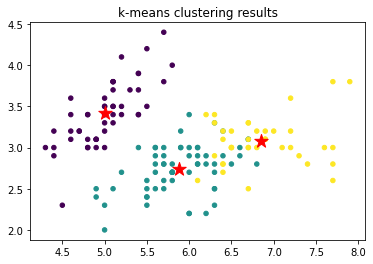

In [ ]:
clusters, init_centroids, centroids = my_kmeans(X, k, max_iterations=20, isPlot=False)
plt.title("k-means clustering results")
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = "*", s = 200, color = "red")

plt.show()

In [ ]:
predicted_labels, init_centroids, centroids = my_kmeans(X, k, max_iterations=10)

In [ ]:
kmeans = KMeans(n_clusters=k, init='k-means++')


kmeans.fit(X)


predicted_labels_sklearn = kmeans.predict(X)
print("Final centroids selected by sklearn.kmeans are:\n", np.around(kmeans.cluster_centers_, decimals=2))

Final centroids selected by sklearn.kmeans are:
 [[5.01 3.42 1.46 0.24]
 [5.9  2.75 4.39 1.43]
 [6.85 3.07 5.74 2.07]]


In [ ]:
ari_k2=adjusted_rand_score(labels, predicted_labels_sklearn)
print("ari for kmeans is",ari_k2)

ari for kmeans is 0.7302382722834697


**Hierarchical clustering**

**Single linkage**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Real/iris2_k=3.txt', sep=",", header=None)

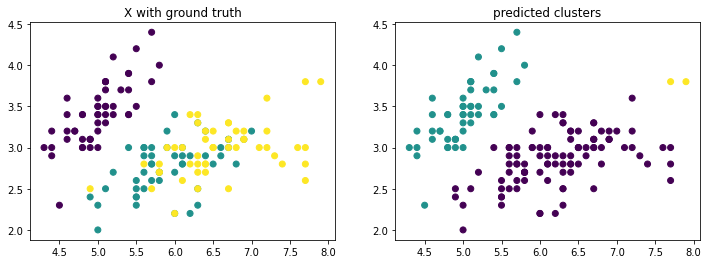

In [ ]:
X, labels = df.iloc[:, :-1], df.iloc[:, -1]
X, labels = np.array(X), np.array(labels, dtype=int)
k = len(set(labels))
N, f = X.shape  
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
  
ax[0].set_title('X with ground truth')
ax[0].scatter(X[:, 0], X[:, 1], c=labels)

hierarchical = AgglomerativeClustering(n_clusters=k, linkage='single').fit(X)
predicted_labels = hierarchical.labels_

ax[1].scatter(X[:, 0], X[:, 1], c=predicted_labels)
ari_h2 = round(adjusted_rand_score(labels, predicted_labels), 4)
ax[1].set_title('predicted clusters')
plt.show()

In [ ]:
print("Ari for hierarchical clustering is ",ari_h2)

Ari for hierarchical clustering is  0.5638


** DBSCAN**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Real/iris2_k=3.txt', sep=",", header=None)

In [ ]:
X, labels = df.iloc[:, :-1], df.iloc[:, -1]
X, labels = np.array(X), np.array(labels, dtype=int)
k = len(set(labels))

In [ ]:
dbscan = DBSCAN(eps=5, min_samples=5)
dbscan.fit(X)
predicted_labels = dbscan.labels_
predicted_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
border_indices, non_border_indices = np.where(predicted_labels == -1)[0], np.where(predicted_labels != -1)[0]
X_border, X_non_border = X[border_indices], X[non_border_indices]
predicted_labels_non_border = predicted_labels[non_border_indices]
labels_non_border = labels[non_border_indices]

print("number of border points    :", len(border_indices))
print("number of non-border points:", len(non_border_indices))
print("number of clusters detected:", len(set(predicted_labels_non_border)))

number of border points    : 0
number of non-border points: 150
number of clusters detected: 1


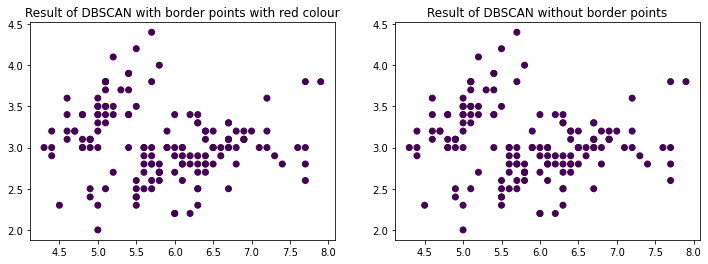

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(X_border[:, 0], X_border[:, 1], color='red')
ax[0].scatter(X_non_border[:, 0], X_non_border[:, 1], c=predicted_labels_non_border)
ax[0].set_title("Result of DBSCAN with border points with red colour")

ax[1].scatter(X_non_border[:, 0], X_non_border[:, 1], c=predicted_labels_non_border)
ax[1].set_title("Result of DBSCAN without border points")

plt.show()

In [ ]:
ari_d2 = adjusted_rand_score(labels, predicted_labels)
ari_d21 = adjusted_rand_score(labels_non_border, predicted_labels_non_border)

print("ARI (with border points)   :", ari_d2)
print("ARI (without border points):", ari_d21)

ARI (with border points)   : 0.0
ARI (without border points): 0.0


**COMPARISION OF Kmeans,Hierarchical clustering(single linkage),DBSCAN Algorithams**

In [ ]:
ari_arr = []
ari_arr.append(["iris2_k=2.txt", ari_k2, ari_h2, ari_d2, ari_d21])

In [ ]:
ari_df = pd.DataFrame(ari_arr, columns=['datasets', 'Kmeans', 'Hierarical', 'DBscan with borderpoints','Dbscan with no border points'])
ari_df

,datasets,Kmeans,Hierarical,DBscan with borderpoints,Dbscan with no border points
0,iris2_k=2.txt,0.730238,0.5638,0.0,0.0


**FOR SYNTHETIC DATASETS**

**K-Means Algorithms**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Synthetic/jain_k=2.txt', sep="\t", header=None)

In [ ]:
X, labels = df.iloc[:, :-1], df.iloc[:, -1]
X, labels = np.array(X), np.array(labels, dtype=int)
X.shape, len(labels)

((373, 2), 373)

In [ ]:
classes = set(labels)
classes

{1, 2}

In [ ]:
k = len(classes) 
N, f = X.shape 
k, N, f

(2, 373, 2)

In [ ]:
def my_kmeans(X, k, init_centroids=None, max_iterations = 10, isPlot=False):
  N, f = X.shape
  
 
  if init_centroids == None:
    X1 = np.array(X)
    np.random.shuffle(X1)
    init_centroids = X1[0:k, :]
  else:
    init_centroids = np.array(init_centroids)
  
  centroids = np.array(init_centroids)

  if isPlot:
    plt.title("Initial centroids")
    plt.scatter(X[:, 0], X[:, 1], s = 20)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="*", color = "red", s = 200)
    plt.show()
    
  clusters = np.zeros(N, dtype='int')

  for iter_no in range(max_iterations): 
  
    distances = distance.cdist(X, centroids)
    clusters = distances.argmin(axis=1)

    new_centroids = np.zeros((k, f))
    for cluster_no in range(k):
      points = X[np.where(clusters==cluster_no)]
      new_centroids[cluster_no] = np.mean(points, axis = 0)

   
    if isPlot:
      plt.title("result after iteration " + str(iter_no))
      plt.scatter(X[:, 0], X[:, 1], c=clusters, s=20)
      plt.scatter(new_centroids[:, 0], new_centroids[:, 1], marker = "*", s = 200, color = "red")
      plt.show()

    diff = (new_centroids - centroids).sum()

    centroids = new_centroids

    
    if diff == 0:
      break
    
  return clusters, init_centroids, centroids

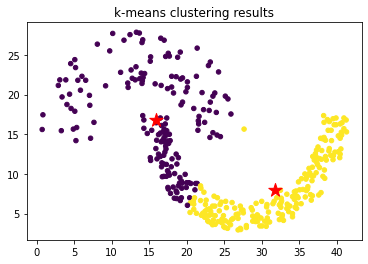

In [ ]:
clusters, init_centroids, centroids = my_kmeans(X, k, max_iterations=20, isPlot=False)
plt.title("k-means clustering results")
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = "*", s = 200, color = "red")
# plt.scatter(init_centroids[:, 0], init_centroids[:, 1], marker = "o", s = 100, color = "blue")
plt.show()

In [ ]:
predicted_labels, init_centroids, centroids = my_kmeans(X, k, max_iterations=10)

In [ ]:
kmeans = KMeans(n_clusters=k, init='k-means++')


kmeans.fit(X)


predicted_labels_sklearn = kmeans.predict(X)
print("Final centroids selected by sklearn.kmeans are:\n", np.around(kmeans.cluster_centers_, decimals=2))

Final centroids selected by sklearn.kmeans are:
 [[31.72  8.04]
 [15.98 16.79]]


In [ ]:
#print("ARI score of sklearn.kmeans: ",adjusted_rand_score(labels, predicted_labels_sklearn))
ari_k1=adjusted_rand_score(labels, predicted_labels_sklearn)
print("ari for kmeans is",ari_k1)

ari for kmeans is 0.3241080446115835


**Hierarchical clustering**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Synthetic/jain_k=2.txt',sep="\t", header=None)

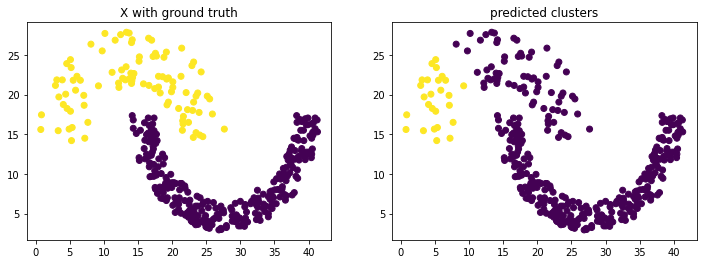

In [ ]:
X, labels = df.iloc[:, :-1], df.iloc[:, -1]
X, labels = np.array(X), np.array(labels, dtype=int)
k = len(set(labels))
N, f = X.shape  
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
#fig.suptitle("results of hierarchical clustering on " + file[:-4])
ax[0].set_title('X with ground truth')
ax[0].scatter(X[:, 0], X[:, 1], c=labels)

hierarchical = AgglomerativeClustering(n_clusters=k, linkage='single').fit(X)
predicted_labels = hierarchical.labels_

ax[1].scatter(X[:, 0], X[:, 1], c=predicted_labels)
ari_h1 = round(adjusted_rand_score(labels, predicted_labels), 4)
ax[1].set_title('predicted clusters')
plt.show()

In [ ]:
print("Ari for hierarchical clustering is ",ari_h1)

Ari for hierarchical clustering is  0.2563


** DBSCAN Algorithms**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Synthetic/jain_k=2.txt',sep="\t", header=None)

In [ ]:
X, labels = df.iloc[:, :-1], df.iloc[:, -1]
X, labels = np.array(X), np.array(labels, dtype=int)
k = len(set(labels))

In [ ]:
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan.fit(X)
predicted_labels = dbscan.labels_
predicted_labels

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
border_indices, non_border_indices = np.where(predicted_labels == -1)[0], np.where(predicted_labels != -1)[0]
X_border, X_non_border = X[border_indices], X[non_border_indices]
predicted_labels_non_border = predicted_labels[non_border_indices]
labels_non_border = labels[non_border_indices]

print("number of border points    :", len(border_indices))
print("number of non-border points:", len(non_border_indices))
print("number of clusters detected:", len(set(predicted_labels_non_border)))

number of border points    : 1
number of non-border points: 372
number of clusters detected: 1


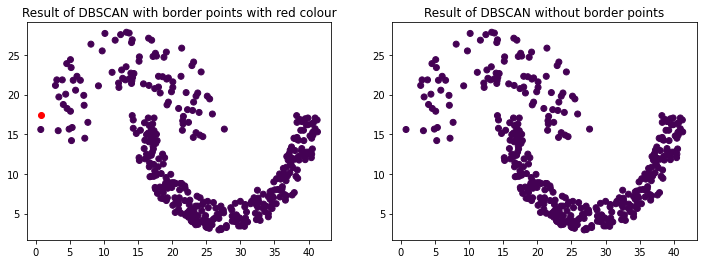

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(X_border[:, 0], X_border[:, 1], color='red')
ax[0].scatter(X_non_border[:, 0], X_non_border[:, 1], c=predicted_labels_non_border)
ax[0].set_title("Result of DBSCAN with border points with red colour")

ax[1].scatter(X_non_border[:, 0], X_non_border[:, 1], c=predicted_labels_non_border)
ax[1].set_title("Result of DBSCAN without border points")

plt.show()

In [ ]:
ari_d = adjusted_rand_score(labels, predicted_labels)
ari_d1 = adjusted_rand_score(labels_non_border, predicted_labels_non_border)

print("ari with border points)  :", ari_d)
print("ari without border points):", ari_d1)

ari with border points)  : 0.00986341671438256
ari without border points): 0.0


**COMPARISION OF Kmeans,Hierarchical clustering(single linkage),DBSCAN Algorithams**

In [ ]:
ari_arr = []
ari_arr.append(["Aggregration_k=7.txt", ari_k1, ari_h1, ari_d, ari_d1])

In [ ]:
ari_df = pd.DataFrame(ari_arr, columns=['datasets', 'Kmeans', 'Hierarical', 'DBscan with borderpoints','Dbscan with no border points'])
ari_df

,datasets,Kmeans,Hierarical,DBscan with borderpoints,Dbscan with no border points
0,Aggregration_k=7.txt,0.324108,0.2563,0.009863,0.0
